<h1 style="text-align: center;"> KNN Model: Classification Problem</h1>

In [18]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
# loading the dataset

data = load_iris()
print(data.data.shape)

(150, 4)


In [5]:
# printing the dataset as a DataFrame

data_df = pd.DataFrame(data.data, columns=['Sepal length','Sepal width','Petal length', 'Petal width'])

data_df.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


(1.5, 3.9000000000000004)

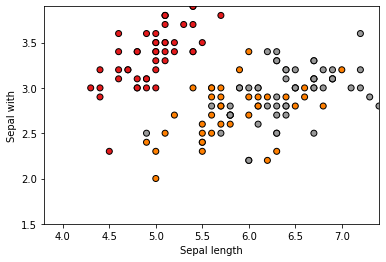

In [15]:
x = data.data[:,:2]
y = data.target
x_min, x_max = x[:,0].min()-0.5, x[:,0].max()-0.5
y_min, y_max = x[:,1].min()-0.5, x[:,1].max()-0.5


#plot Datapoints

plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.Set1, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal with')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

In [16]:
# Dividing the dataset into training and testing sets.

X = data.data
Y = data.target

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

In [22]:
# training our KNN model
nbr = KNeighborsClassifier(n_neighbors=3, algorithm="ball_tree")
nbr.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)

In [24]:
# testing the model nbr
classification_restuls = nbr.predict(x_test)
print(classification_restuls)
print(y_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [25]:
# Find the performance of your.
print(metrics.classification_report(classification_restuls,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Confusion Matrix
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


/Users/carlos-theran/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


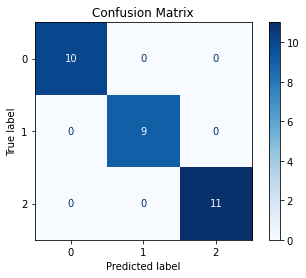

In [29]:
#plot the confusion matrix
from sklearn.metrics import plot_confusion_matrix
title_options = [("Confusion Matrix",None)]

for title, normalize in title_options:
    disp = plot_confusion_matrix(nbr,x_test,y_test, cmap = plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)